In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn import datasets, metrics, model_selection


In [46]:
# non pcas

xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
df = pd.read_excel(xlsx, '1S 4X')
dataset1= df.copy()




from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Sd_scaler1 =scaler1.fit(dataset1)
data1_Sd= Sd_scaler1.transform(dataset1)
print(data1_Sd)
    
    #convert to dataframe
dataset= pd.DataFrame(data1_Sd, columns=dataset1.keys())

# dropping columns
droppies= [ 'SFL' , 'NPHI', 'LLS', 'LLD']

dataset.drop(droppies, inplace=True, axis=1)

# split datat into input and target

inputs = dataset.copy()

target = inputs.pop('RHOB')


train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target, train_size=0.7)

print('train samples:', len(train_input))
print('test samples', len(test_input))


[[-1.73163915  2.51697914  0.14781493 ... -2.87725798 -0.02998333
  -3.06763472]
 [-1.73081574  2.52923055  0.4129627  ... -2.93944911 -0.31479146
  -3.7477384 ]
 [-1.72999232  2.54148197  0.80347369 ... -3.00164023 -0.25737338
  -4.21784884]
 ...
 [ 1.72999232 -0.57576699 -0.63341287 ...  0.06032096 -0.12310411
   1.7543647 ]
 [ 1.73081574 -0.57596783 -0.60694777 ...  0.14599241 -0.13214277
   1.74230317]
 [ 1.73163915 -0.57616867 -0.90593453 ...  0.15804987 -0.15340622
   1.7008101 ]]
train samples: 2944
test samples 1263


In [47]:
dataset

,DEPTH,CALI,GR,ILD,ITT,MSFL,RHOB,SP
0,-1.731639,2.516979,0.147815,0.637840,-0.317773,-0.685180,-2.877258,-3.067635
1,-1.730816,2.529231,0.412963,-0.218280,-0.412743,-0.685559,-2.939449,-3.747738
2,-1.729992,2.541482,0.803474,-0.114471,-0.507713,-0.685904,-3.001640,-4.217849
3,-1.729169,2.553733,1.058458,0.136484,-0.602683,-0.685559,-3.063831,-4.944131
4,-1.728345,2.565985,1.026933,0.278547,-0.593186,-0.685870,-3.126022,-5.242861
...,...,...,...,...,...,...,...,...
4202,1.728345,-0.575181,-0.686343,-0.077954,-1.386187,-0.267572,-0.008639,1.709306
4203,1.729169,-0.575474,-0.659878,-0.065343,-1.362445,-0.270226,-0.029158,1.746619
4204,1.729992,-0.575767,-0.633413,-0.044466,-1.343451,-0.272881,0.060321,1.754365
4205,1.730816,-0.575968,-0.606948,-0.023588,-1.329205,-0.275536,0.145992,1.742303


In [48]:
dataset.shape[1]

8

# model

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


model = Sequential()

model.add(Dense(64,activation="relu"
                          , input_shape=(dataset.shape[1]-1,), 
#                           kernel_regularizer="l2"
                         ))
    
    
#     LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(Dense(64,activation="relu"
#                           kernel_regularizer="l2"
                         ))
model.add(Dropout(0.2))


model.add(Dense(units = 1))
              

model.compile(optimizer = 'adam', loss = 'mae')

model.summary()
    

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                512       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


# train

In [50]:
%%time
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(
    train_input, train_target,
    validation_split=0.3,
    verbose=0,
    batch_size = 4,
    

    #early stopping
    callbacks= keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
    
    #to store callbacks in logs
#     callbacks =[tb_callback]
)

Wall time: 1.38 s


# tunning

In [ ]:
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasRegressor

# Function to create model,for KerasClassifier
def create_my_model():
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(64, input_dim=11, activation='relu'))
    mymodel.add(Dropout(0.2))
    mymodel.add(Dense(64, input_dim=11, activation='relu'))
    mymodel.add(Dropout(0.2))
    mymodel.add(Dense(1))
    
    # Compile the model
    mymodel.compile(loss='mae', optimizer='adam', metrics=['mse'])
    return mymodel

# create model
model_BE = KerasRegressor(build_fn=create_my_model)


# define the grid search parameters
batchSize = [2,3,4,5,7, 10, 12, 15, 20, 30, 40, 50, 60,70, 80, 90, 100]
# epochs = [5,10,15, 30, 50,70,100,150]

parameter_grid = dict(batch_size=batchSize,
#                       epochs=epochs
                     )

from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasRegressor
mygrid = GridSearchCV(estimator=model_BE, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = mygrid.fit(train_input, train_target)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()

    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=2,
                                            max_value=64,
                                            step=2,            
#                                             sampling="log"
                                           ),
                                            activation= 'relu'
                              ))
#         for i in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] 
#         model.add(layers.Dropout(rate=hp.Float('D_rate_'+ str(i),
#                                               min_value=0.0,
#                                               max_value=1.0,
#                                               step=0.1
#                                                                                           ),       
#                                 ))

    model.add(layers.Dense(1,
#                            activation='linear'
                          ))
    model.compile(
        optimizer='adam',
#         keras.optimizers.Adam
#         (
#         hp.Choice('learning_rate', [0.15, 0.1, 1e-2, 1e-3, 1e-4])),
        loss='mae',
        metrics=['mse'])
    return model


tuner = RandomSearch(
    build_model,
    objective=  'val_loss',   #   'val_mean_absolute_error', #(['loss', 'mse', 'val_loss', 'val_mse']
    max_trials=10,
    executions_per_trial=5,
    directory='Test_weights2',
    project_name='ANNTuning2')


mygrid = GridSearchCV(estimator=model_BE, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = mygrid.fit(train_input, train_target)




tuner.search_space_summary()

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing


tuner.search(train_input, train_target,
#              epochs=35,
             validation_data=(test_input, test_target)
    
            
            
            )

In [ ]:
tuner.results_summary()

Text(0, 0.5, 'Predicted')

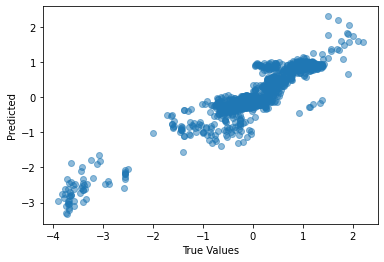

In [51]:


# predicted = myFFBP.predict(test_input) #.flatten() ##Flattening converts multidimensional lists into one-dimensional lists

predicted = model.predict(test_input)

fig, ax = plt.subplots()
ax.scatter(test_target, predicted, alpha=0.5)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')


In [52]:
# using sklearn
print("r2 score: {}".format(metrics.r2_score(test_target,predicted)))
print("mse: {}".format(metrics.mean_squared_error(test_target, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(test_target, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

r2 score: 0.8721124682866437
mse: 0.13085125318957233
rmse: 0.36173367715706584
mae: 0.25132791736146226


# Testing model on different wells

         DEPTH      CALI        GR       ILD       ITT      MSFL      RHOB  \
0    -1.731814  0.316453 -0.829876 -0.699847  1.634745 -0.538424  0.063099   
1    -1.731341  0.288699 -0.936744 -0.688403  1.621596 -0.535204 -0.066989   
2    -1.730867  0.260945 -0.941118 -0.676901  1.608446 -0.530878 -0.197077   
3    -1.730394  0.189632 -0.945492 -0.672055  1.615021 -0.527859 -0.327165   
4    -1.729920  0.145044 -0.949866 -0.668260  1.647895 -0.525042 -0.457253   
...        ...       ...       ...       ...       ...       ...       ...   
7312  1.729920 -1.119598  0.738279 -0.170576 -0.854434 -0.709215  1.784956   
7313  1.730394 -1.119810  0.712989 -0.160358 -0.855748 -0.860840  1.728946   
7314  1.730867 -1.120022  0.753378 -0.151075 -0.857063 -0.882875  1.760564   
7315  1.731341 -1.120234  0.797045 -0.141791 -0.837339 -0.899526  1.626863   
7316  1.731814 -1.120446  0.840713 -0.132508 -0.830765 -0.894546  1.493162   

            SP  
0    -1.370831  
1    -1.365787  
2    -1.3610

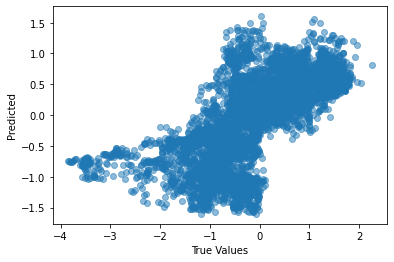

In [56]:
# Feat_extracts well3


def predictme(wellname):
    
    xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
    df = pd.read_excel(xlsx, wellname)
    dataset_ext= df.copy()


    from sklearn.preprocessing import StandardScaler
    scaler1 = StandardScaler()
    Sd_scaler1 =scaler1.fit(dataset_ext)
    data1_Sd= Sd_scaler1.transform(dataset_ext)
    # print(data1_Sd)

            #convert to dataframe
    dataset= pd.DataFrame(data1_Sd, columns=dataset_ext.keys())


    # dropping columns
    dataset.drop(droppies, inplace=True, axis=1)

    print(dataset)
    # split datat into input and target

    inputs2 = dataset.copy()
    target = inputs2.pop('RHOB')


    predicted = model.predict(inputs2)

    fig, ax = plt.subplots()
    ax.scatter(target, predicted, alpha=0.5)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted')


    print("r2 score: {}".format(metrics.r2_score(target, predicted)))
    print("mse: {}".format(metrics.mean_squared_error(target, predicted)))
    print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(target, predicted))))
    print("mae: {}".format(metrics.mean_absolute_error(target, predicted)))
    
    return 

predictme('1S 3X')
